**Setting the work directory**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/Aleena Mary Abraham/OneDrive/Desktop/SCMA632_2025/DATA')

In [3]:
ipl_bbb = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv',low_memory=False)

In [4]:
ipl_salary = pd.read_excel('IPL SALARIES 2024.xlsx')

In [5]:
ipl_salary.columns

Index(['Player', 'Salary', 'Rs', 'international', 'iconic'], dtype='object')

In [6]:
ipl_salary.rename(columns={'Rs':'Lakh Rs'})

,Player,Salary,Lakh Rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN
2,Axar Patel,9 crore,900,0,NaN
3,David Warner,6.25 crore,625,1,NaN
4,Ishant Sharma,50 lakh,50,0,NaN
...,...,...,...,...,...
161,Shahbaz Ahamad (T),2.4 crore,240,0,NaN
162,T. Natarajan,3.2 crore,320,0,NaN
163,Umran Malik,4 crore,400,0,NaN
164,Upendra Singh Yadav,25 lakh,25,0,NaN


In [7]:
grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker', 'Bowler']).agg({'runs_scored': 'sum', 'wicket_confirmation': 'sum'}).reset_index()

In [8]:
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()

In [9]:
player_runs[player_runs['Season']=='2023'].sort_values(by='runs_scored',ascending=False)

,Season,Striker,runs_scored
2423,2023,Shubman Gill,890
2313,2023,F du Plessis,730
2311,2023,DP Conway,672
2433,2023,V Kohli,639
2443,2023,YBK Jaiswal,625
...,...,...,...
2404,2023,RP Meredith,0
2372,2023,Mohsin Khan,0
2307,2023,DG Nalkande,0
2429,2023,TU Deshpande,0


In [10]:
top_run_getters = player_runs.groupby('Season', group_keys=False).apply(lambda x: x.nlargest(3, 'runs_scored'),include_groups=False).reset_index(drop=True)
bottom_wicket_takers = player_wickets.groupby('Season', group_keys=False).apply(lambda x: x.nlargest(3, 'wicket_confirmation'),include_groups=False).reset_index(drop=True)
print("Top Three Run Getters:")
print(top_run_getters)
print("Top Three Wicket Takers:")
print(bottom_wicket_takers)

Top Three Run Getters:
            Striker  runs_scored
0          SE Marsh          616
1         G Gambhir          534
2     ST Jayasuriya          514
3         ML Hayden          572
4      AC Gilchrist          495
5    AB de Villiers          465
6      SR Tendulkar          618
7         JH Kallis          572
8          SK Raina          528
9          CH Gayle          608
10          V Kohli          557
11     SR Tendulkar          553
12         CH Gayle          733
13        G Gambhir          590
14         S Dhawan          569
15       MEK Hussey          733
16         CH Gayle          720
17          V Kohli          639
18       RV Uthappa          660
19         DR Smith          566
20       GJ Maxwell          552
21        DA Warner          562
22        AM Rahane          540
23      LMP Simmons          540
24          V Kohli          973
25        DA Warner          848
26   AB de Villiers          687
27        DA Warner          641
28        G Gambhir 

In [11]:
ipl_year_id = pd.DataFrame(columns=["id", "year"])
ipl_year_id["id"] = ipl_bbb["Match id"]
ipl_year_id["year"] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year

In [12]:
#creating a copy of ipl_bbb dataframe
ipl_bbbc= ipl_bbb.copy()

In [13]:
ipl_bbbc['year'] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year

In [14]:
ipl_bbbc[["Match id", "year", "runs_scored","wicket_confirmation","Bowler",'Striker']].head()

,Match id,year,runs_scored,wicket_confirmation,Bowler,Striker
0,335982,2008,0,0,P Kumar,SC Ganguly
1,335982,2008,0,0,P Kumar,BB McCullum
2,335982,2008,0,0,P Kumar,BB McCullum
3,335982,2008,0,0,P Kumar,BB McCullum
4,335982,2008,0,0,P Kumar,BB McCullum


In [15]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ['alpha','beta','betaprime','burr12','crystalball',
                  'dgamma','dweibull','erlang','exponnorm','f','fatiguelife',
                  'gamma','gengamma','gumbel_l','johnsonsb','kappa4',
                  'lognorm','nct','norm','norminvgauss','powernorm','rice',
                  'recipinvgauss','t','trapz','truncnorm']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print("\nBest fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    return best_dist, best_p, params[best_dist]

In [16]:
total_run_each_year = ipl_bbbc.groupby(["year", "Striker"])["runs_scored"].sum().reset_index()

In [17]:
total_run_each_year.sort_values(["year", "runs_scored"], ascending=False, inplace=True)
print(total_run_each_year)

      year          Striker  runs_scored
2549  2024       RD Gaikwad          509
2589  2024          V Kohli          500
2470  2024  B Sai Sudharsan          418
2502  2024         KL Rahul          406
2555  2024          RR Pant          398
...    ...              ...          ...
58    2008         L Balaji            0
66    2008   M Muralitharan            0
75    2008         MM Patel            0
107   2008      S Sreesanth            0
136   2008           U Kaul            0

[2598 rows x 3 columns]


In [18]:
list_top_batsman_last_three_year = {}
for i in total_run_each_year["year"].unique()[:3]:
    list_top_batsman_last_three_year[i] = total_run_each_year[total_run_each_year.year == i][:3]["Striker"].unique().tolist()

In [19]:
list_top_batsman_last_three_year

{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [20]:
import warnings
warnings.filterwarnings('ignore')
runs = ipl_bbbc.groupby(['Striker','Match id'])[['runs_scored']].sum().reset_index()

for key in list_top_batsman_last_three_year:
    for Striker in list_top_batsman_last_three_year[key]:
        print("************************")
        print("year:", key, " Batsman:", Striker)
        get_best_distribution(runs[runs["Striker"] == Striker]["runs_scored"])
        print("\n\n")

************************
year: 2024  Batsman: RD Gaikwad
p value for alpha = 2.599259711013304e-20
p value for beta = 0.02041902689492492
p value for betaprime = 0.0195037635986679
p value for burr12 = 0.46882020698395865
p value for crystalball = 0.24953646987270617
p value for dgamma = 0.1570743843120962
p value for dweibull = 0.20046582403736823
p value for erlang = 1.893799588395604e-06
p value for exponnorm = 0.4644304230917985
p value for f = 1.3560920695663998e-07
p value for fatiguelife = 1.304427037367869e-14
p value for gamma = 0.005830868576003456
p value for gengamma = 0.015331622187827243
p value for gumbel_l = 0.05546236480086464
p value for johnsonsb = 4.646964117947127e-13
p value for kappa4 = 0.006363220770325362
p value for lognorm = 1.1719355665219537e-16
p value for nct = 0.5881570496217812
p value for norm = 0.2495365180930973
p value for norminvgauss = 0.5538573365184996
p value for powernorm = 0.1788753268739085
p value for rice = 0.18287532184336575
p value for 

In [22]:
total_wicket_each_year = ipl_bbbc.groupby(["year", "Bowler"])["wicket_confirmation"].sum().reset_index()

In [23]:
total_wicket_each_year.sort_values(["year", "wicket_confirmation"], ascending=False, inplace=True)
print(total_wicket_each_year)

      year             Bowler  wicket_confirmation
1836  2024           HV Patel                   19
1875  2024       Mukesh Kumar                   15
1822  2024     Arshdeep Singh                   14
1842  2024          JJ Bumrah                   14
1876  2024  Mustafizur Rahman                   14
...    ...                ...                  ...
16    2008           CL White                    0
41    2008             K Goel                    0
43    2008          LPC Silva                    0
60    2008       Pankaj Singh                    0
90    2008        VS Yeligati                    0

[1929 rows x 3 columns]


In [24]:
list_top_bowler_last_three_year = {}
for i in total_wicket_each_year["year"].unique()[:3]:
    list_top_bowler_last_three_year[i] = total_wicket_each_year[total_wicket_each_year.year == i][:3]["Bowler"].unique().tolist()
list_top_bowler_last_three_year

{2024: ['HV Patel', 'Mukesh Kumar', 'Arshdeep Singh'],
 2023: ['MM Sharma', 'Mohammed Shami', 'Rashid Khan'],
 2022: ['YS Chahal', 'PWH de Silva', 'K Rabada']}

In [25]:
import warnings
warnings.filterwarnings('ignore')
wickets = ipl_bbbc.groupby(['Bowler','Match id'])[['wicket_confirmation']].sum().reset_index()

for key in list_top_bowler_last_three_year:
    for bowler in list_top_bowler_last_three_year[key]:
        print("************************")
        print("year:", key, " Bowler:", bowler)
        get_best_distribution(wickets[wickets["Bowler"] == bowler]["wicket_confirmation"])
        print("\n\n")

************************
year: 2024  Bowler: HV Patel
p value for alpha = 0.0002993252328930706
p value for beta = 2.777571908776589e-19
p value for betaprime = 1.7052883875145053e-30
p value for burr12 = 5.427998338605459e-15
p value for crystalball = 1.1109118198587684e-05
p value for dgamma = 4.375428528574276e-05
p value for dweibull = 1.8553295107771936e-05
p value for erlang = 5.473635282991912e-24
p value for exponnorm = 0.0002813279943461815
p value for f = 1.9012983291282487e-09
p value for fatiguelife = 1.9734428958773156e-05
p value for gamma = 1.470787431589663e-16
p value for gengamma = 1.4345058849022962e-16
p value for gumbel_l = 4.541523588271283e-05
p value for johnsonsb = 2.827201329331457e-51
p value for kappa4 = 9.177530010006471e-23
p value for lognorm = 5.2162358572043325e-22
p value for nct = 0.0001960277304576293
p value for norm = 1.1109124960635979e-05
p value for norminvgauss = 3.811196478020808e-05
p value for powernorm = 3.218641746305825e-05
p value for ri

**Finding Best Fit Distribution for: AK Markram**

In [26]:
player_name = 'AK Markram' 
player_data = ipl_bbb[
    (ipl_bbb['Season'].astype(str).isin(['2022', '2023', '2024'])) &
    (ipl_bbb['Striker'] == player_name) 
]

In [27]:
runs = player_data['runs_scored'].values

In [28]:
runs

array([4, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 4, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 6, 4, 1, 1, 4, 6, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 4, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 6, 4, 1, 1, 0, 1, 1, 0, 1, 1, 4, 4, 4, 1,
       1, 4, 6, 1, 1, 0, 1, 1, 1, 4, 6, 6, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 0, 1, 1, 4, 2, 1, 1, 1, 4, 2, 4, 1, 1, 1, 4, 6, 0, 0, 1, 1, 0,
       4, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 6, 1, 1, 0, 0, 1, 1, 1,
       0, 6, 0, 1, 4, 1, 2, 1, 6, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 6,
       6, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 1, 1, 1, 0, 2, 6, 1, 0, 0, 4, 4,
       0, 4, 0, 6, 6, 0, 0, 0, 0, 0, 1, 4, 6, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 6, 0, 6, 0, 0, 1, 6, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 0, 0, 0, 1, 1, 1, 1, 4, 1, 0, 1,
       1, 1, 2, 4, 1, 1, 0, 1, 4, 0, 4, 4, 4, 1, 0,

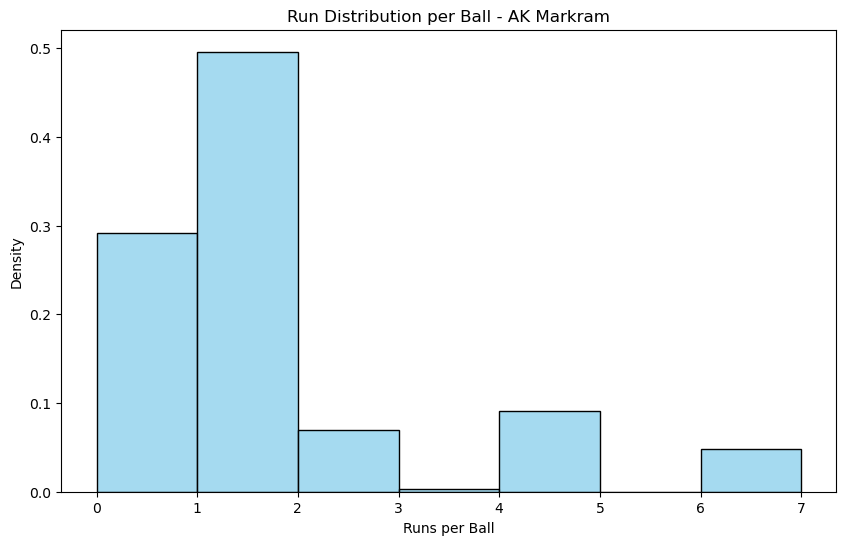

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(runs, bins=range(0, 8), kde=False, stat="density", color='skyblue', edgecolor='black')
plt.title("Run Distribution per Ball - AK Markram")
plt.xlabel("Runs per Ball")
plt.ylabel("Density")
plt.show()

In [30]:
type(runs)

numpy.ndarray

In [31]:
runs = ipl_bbbc.groupby(['Striker', 'Match id'])[['runs_scored']].sum().reset_index()

In [32]:
player_name = "AK Markram"
markram_runs = runs[runs["Striker"] == player_name]["runs_scored"]

print(f"Total matches found for {player_name}: {len(markram_runs)}")

Total matches found for AK Markram: 40


In [33]:
get_best_distribution(markram_runs)

p value for alpha = 1.819276979642808e-15
p value for beta = 0.3923386993733794
p value for betaprime = 0.7808787129312039
p value for burr12 = 0.9237884182519005
p value for crystalball = 0.4780054247301093
p value for dgamma = 0.5240262870988528
p value for dweibull = 0.7098989262362645
p value for erlang = 0.9044727740103984
p value for exponnorm = 0.8761236189539547
p value for f = 1.4257314379416558e-07
p value for fatiguelife = 0.8828939551830527
p value for gamma = 0.9044712103969049
p value for gengamma = 0.010650314754168888
p value for gumbel_l = 0.2388176666022057
p value for johnsonsb = 0.8165748814035785
p value for kappa4 = 0.2867023519881332
p value for lognorm = 3.597840981722139e-11
p value for nct = 0.8452925158091512
p value for norm = 0.47800548559148515
p value for norminvgauss = 0.8717074300239076
p value for powernorm = 0.7823808870017787
p value for rice = 0.7900184621179734
p value for recipinvgauss = 0.8890967106464222
p value for t = 0.4777173755178854
p valu

('truncnorm',
 0.9884664329166628,
 (-0.0753044365794551,
  2.0396814396841254,
  2.4210677493492394,
  32.151556108391276))

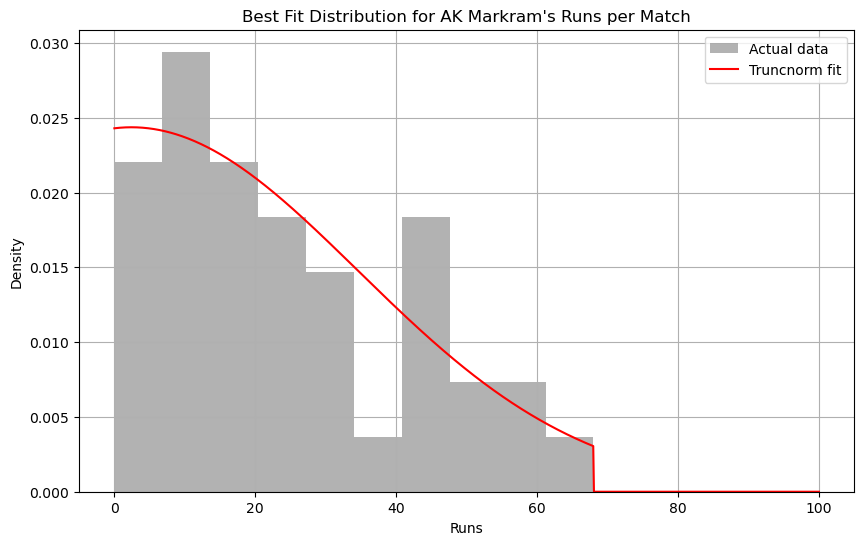

In [34]:
from scipy.stats import truncnorm

# Using the parameters from previous result
a, b, loc, scale = (-0.0753044365794551, 2.0396814396841254, 2.4210677493492394, 32.151556108391276)

x = np.linspace(0, 100, 1000)
pdf = truncnorm.pdf(x, a, b, loc=loc, scale=scale)

plt.figure(figsize=(10, 6))
plt.hist(markram_runs, bins=10, density=True, alpha=0.6, color='gray', label='Actual data')
plt.plot(x, pdf, 'r-', label='Truncnorm fit')
plt.title("Best Fit Distribution for AK Markram's Runs per Match")
plt.xlabel("Runs")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

**Relationship between the performance of a player and the salary he gets**

In [35]:
R2024 =total_run_each_year[total_run_each_year['year']==2024]

In [36]:
!pip install fuzzywuzzy[speedup]

In [37]:
from fuzzywuzzy import process

# Convert to DataFrame
df_salary = ipl_salary.copy()
df_runs = R2024.copy()

# Function to match names
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None  # Use a threshold score of 80

# Create a new column in df_salary with matched names from df_runs
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, df_runs['Striker'].tolist()))

# Merge the DataFrames on the matched names
df_merged = pd.merge(df_salary, df_runs, left_on='Matched_Player', right_on='Striker')

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          111 non-null    object 
 1   Salary          111 non-null    object 
 2   Rs              111 non-null    int64  
 3   international   111 non-null    int64  
 4   iconic          0 non-null      float64
 5   Matched_Player  111 non-null    object 
 6   year            111 non-null    int32  
 7   Striker         111 non-null    object 
 8   runs_scored     111 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 7.5+ KB


In [39]:
# Calculation of correlation
correlation = df_merged['Rs'].corr(df_merged['runs_scored'])

print("Correlation between Salary and Runs:", correlation)

Correlation between Salary and Runs: 0.3061248376582167
